# Import libraries

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

# Data preparation 

## 1.Training

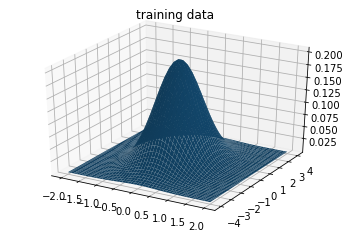

In [45]:
# Initialize dataset for training
x1,x2=np.mgrid[-2.0:2.0:50j,-4.0:4.0:50j]
x_train = np.column_stack([x1.flat, x2.flat])

# Hyper parameters of Gaussian function
mu = np.array([0.0, 0.0])
cov = np.diag([[0.3, -0.5] ,
                [-0.5, 2.0]])

y_train = multivariate_normal.pdf(x_train, mean=mu, cov=cov)
y_train= y_train.reshape(x1.shape)

# Draw training dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_train)
plt.title('training data')
plt.show()

y_train=y_train.reshape(50*50,-1)


## 2.Testing

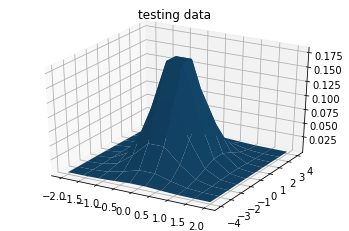

In [44]:
# Initialize dataset for testing
x1,x2=np.mgrid[-2.0:2.0:10j,-4.0:4.0:10j]
x_test = np.column_stack([x1.flat, x2.flat])

# Hyper parameters of Gaussian function
mu = np.array([0.0, 0.0])
cov = np.diag(([0.3, -0.5] ,
                [-0.5, 2.0]))

y_test = multivariate_normal.pdf(x_test, mean=mu, cov=cov)
y_test= y_test.reshape(x1.shape)

# Draw tesing dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y_test)
plt.title('testing data')
plt.show()

y_test= y_test.reshape(100,-1)

# Initialization network

In [4]:
# Parameters
input_size = 2
num_classes = 1

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Training and Evaluating

## 1. Change number of hidden nodes

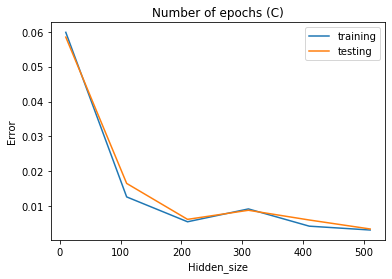

In [47]:
# Parameters for ploting
epochs=[]
hidden=[]
samples=[]
error_train=[]
error_test=[]

# Hyper parameters 
hidden_size=10
num_samples=100
num_epochs=100
learning_rate = 0.001

while hidden_size<600:
    
    # Define model
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    
    # Random choice samples
    sel_indx = np.random.choice(range(1, 2500), size=num_samples, replace=False)
   
    # Training phase
    for epoch in range(num_epochs):
        
        # Data for training
        inputs = torch.from_numpy(x_train[sel_indx]).to(device)
        targets = torch.from_numpy(y_train[sel_indx]).to(device)

        # Forward pass
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    error_train.append(loss.item())
    hidden.append(hidden_size)

    # Testing phase
    with torch.no_grad():
        inputs = torch.from_numpy(x_test).to(device)
        targets = torch.from_numpy(y_test).to(device)
        outputs = model(inputs.float())
        loss_test = criterion(outputs, targets.float())
        error_test.append(loss_test.item())
    
    hidden_size=hidden_size+100
    
# Plot the relationship number of hidden nodes and loss
clear_output()
plt.plot(hidden, error_train, label='training')
plt.plot(hidden, error_test, label='testing')
plt.legend()
plt.title('Number of epochs (C)')
plt.xlabel('Hidden_size')
plt.ylabel('Error')
plt.show()

## 2. Change number of epochs

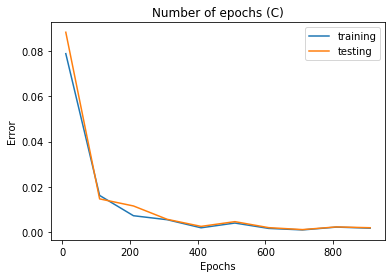

In [52]:
# Parameters for ploting
epochs=[]
hidden=[]
samples=[]
error_train=[]
error_test=[]

# Hyper parameters 
hidden_size=10
num_samples=100
num_epochs=10
learning_rate = 0.01

while num_epochs<1000:
  
    # Define model
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    
    # Random choice samples
    sel_indx = np.random.choice(range(1, 2500), size=num_samples, replace=False)
   
    # Training phase
    for epoch in range(num_epochs):
        
        # Data for training
        inputs = torch.from_numpy(x_train[sel_indx]).to(device)
        targets = torch.from_numpy(y_train[sel_indx]).to(device)

        # Forward pass
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    error_train.append(loss.item())
    epochs.append(num_epochs)

    
    # Testing phase
    with torch.no_grad():
        inputs = torch.from_numpy(x_test).to(device)
        targets = torch.from_numpy(y_test).to(device)
        outputs = model(inputs.float())
        loss_test = criterion(outputs, targets.float())
        error_test.append(loss_test.item())
    
    num_epochs=num_epochs+100

# Plot the relationship number of epochs and loss    
clear_output()
plt.plot(epochs, error_train, label='training')
plt.plot(epochs, error_test, label='testing')
plt.legend()
plt.title('Number of epochs (C)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 3. Change number of training samples

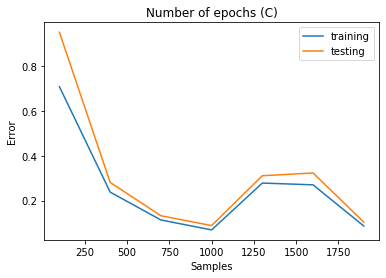

In [71]:
# Parameters for ploting
epochs=[]
hidden=[]
samples=[]
error_train=[]
error_test=[]

# Hyper parameters 
hidden_size=100
num_samples=100
num_epochs=10
learning_rate = 0.00001

while num_samples<2000:
  
    # Define model
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)
    
    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    
    # Random choice samples
    sel_indx = np.random.choice(range(1, 2500), size=num_samples, replace=False)
   
    # Training phase
    for epoch in range(num_epochs):
        
        # Data for training
        inputs = torch.from_numpy(x_train[sel_indx]).to(device)
        targets = torch.from_numpy(y_train[sel_indx]).to(device)

        # Forward pass
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()      
        
    error_train.append(loss.item())
    samples.append(num_samples)
    
    
    # Testing phase
    with torch.no_grad():
        inputs = torch.from_numpy(x_test).to(device)
        targets = torch.from_numpy(y_test).to(device)
        outputs = model(inputs.float())
        loss_test = criterion(outputs, targets.float())
        error_test.append(loss_test.item())
    
    num_samples=num_samples+300

# Plot the relationship number of training samples and loss     
clear_output()
plt.plot(samples, error_train, label='training')
plt.plot(samples, error_test, label='testing')
plt.legend()
plt.title('Number of epochs (C)')
plt.xlabel('Samples')
plt.ylabel('Error')
plt.show()